In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage.filters import convolve
from PIL import Image
import time
from skimage import io

# Load Image

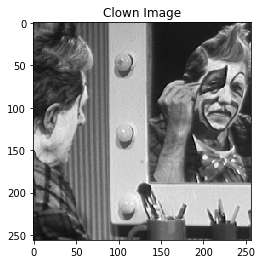

In [2]:
img_path = './dataset/clown.tif'
img = Image.open(img_path)
#print(np.asarray(img).shape)
plt.imshow(img,cmap=plt.get_cmap('gray'))
plt.title("Clown Image")
plt.show()

# Convolve

In [3]:
def Convolve(img,kernel):
    img = np.asarray(img)
    h,w = img.shape[0],img.shape[1]
    
    #################################################################################
    stride = 1
    new_i = 0
    fil_h = kernel.shape[0]
    fil_w = kernel.shape[1]
    new_img = np.zeros((h-fil_h+1,w-fil_w+1))
    #################################################################################
    
    for i in range(h - fil_h+1):
        for j in range(w - fil_w+1):
            im_region = img[i:(i + fil_h), j:(j + fil_w)]
            r = np.multiply(im_region,kernel).sum()
            new_img[i][j] = int(r)#fil_h*fil_w)
    return new_img

# Sobel Filter

In [23]:
Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Gy = Gx.T
#sobel_filter = np.sqrt(np.power(Gy+Gx,2))

In [24]:
#sobel_filter

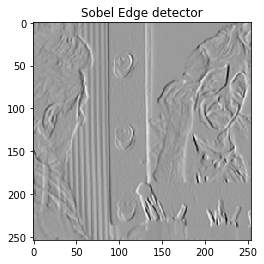

In [16]:
start_time_sobel_x = time.time()
sobel_result_horizontal = Convolve(img,np.flip(Gx))
end_time_sobel_x = time.time()
plt.imshow(sobel_result_horizontal,cmap=plt.get_cmap('gray'))
plt.title("Sobel Edge detector Horizontal")
plt.show()

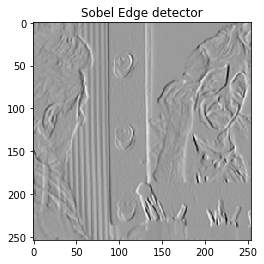

In [13]:
start_time_sobel_y = time.time()
sobel_result_verical = Convolve(img,np.flip(Gy))
end_time_sobel_y = time.time()
plt.imshow(sobel_result_horizontal,cmap=plt.get_cmap('gray'))
plt.title("Sobel Edge detector vertical")
plt.show()

In [10]:
sobel_res = np.sqrt(np.square(sobel_result_horizontal+sobel_result_vertical))

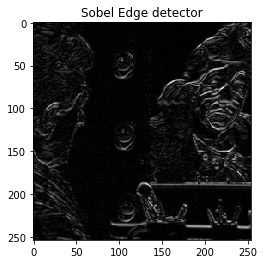

In [11]:
plt.imshow(sobel_res,cmap=plt.get_cmap('gray'))
plt.title("Sobel Edge detector")
plt.show()

In [17]:
print("Time of Sobel : ",(end_time_sobel_x-start_time_sobel_x)+(end_time_sobel_y-start_time_sobel_y))

Time of Sobel :  2.0769498348236084


# Laplacian Filter

In [ ]:
laplace_filter = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
start_time_laplacian = time.time()
laplacian_result = Convolve(img,np.flip(laplace_filter))
end_time_laplacian = time.time()
plt.imshow(laplacian_result,cmap=plt.get_cmap('gray'))
plt.title("Laplacian Edge Detector")
plt.show()

In [ ]:
print("Time of Laplacian : ",end_time_laplacian-start_time_laplacian)

## Compare the results and give a qualitative comment.
Sobel Edge detector able to found vertical and horizontal edges differently so we can combine them as conv satisfies matrix commutative and associativity. Laplacian filter is 2 order derivative filter so rising peak is positive and slope is negative and point of zero crossing is edge location. It is prone to noise because on applying 2 order derivative we can get egde where there is not.

# Part B Comparision with inbuilt function

## Sobel Filter

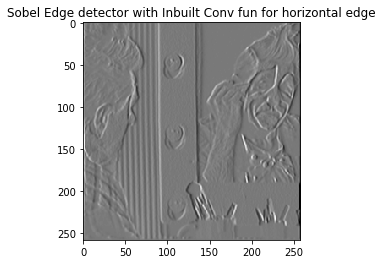

In [18]:
from scipy import signal
start_time_sobel_inbuilt_x = time.time()
sobel_conv_x = signal.convolve2d(img, np.flip(Gx))
end_time_sobel_inbuilt_x = time.time()

plt.imshow(sobel_conv_x,cmap=plt.get_cmap('gray'))
plt.title("Sobel Edge detector with Inbuilt Conv fun for horizontal edge")
plt.show()

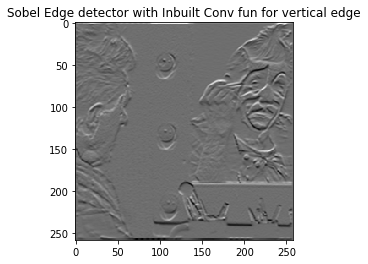

In [19]:
start_time_sobel_inbuilt_y = time.time()
sobel_conv_y = signal.convolve2d(img, np.flip(Gy))
end_time_sobel_inbuilt_y = time.time()

plt.imshow(sobel_conv_y,cmap=plt.get_cmap('gray'))
plt.title("Sobel Edge detector with Inbuilt Conv fun for vertical edge")
plt.show()

In [25]:
sobel_res = np.sqrt(np.square(sobel_conv_x+sobel_conv_y))

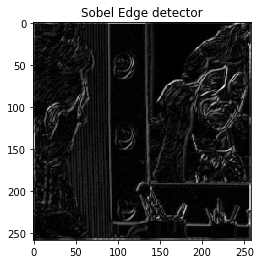

In [26]:
plt.imshow(sobel_res,cmap=plt.get_cmap('gray'))
plt.title("Sobel Edge detector")
plt.show()

In [22]:
print("Time of Inbuilt Conv Sobel: ",(end_time_sobel_inbuilt_y-start_time_sobel_inbuilt_y)+(end_time_sobel_inbuilt_x-start_time_sobel_inbuilt_x))

Time of Inbuilt Conv Sobel:  0.04906797409057617


## Laplacian filter

In [ ]:
start_time_laplacian_inbuilt = time.time()
laplacian_conv = signal.convolve2d(img, np.flip(laplace_filter))
end_time_laplacian_inbuilt = time.time()
plt.imshow(laplacian_conv,cmap=plt.get_cmap('gray'))
plt.title("Laplacian Edge detector with Inbuilt Conv fun")
plt.show()

In [ ]:
print("Time of Inbuilt Conv laplacian: ",end_time_laplacian_inbuilt-start_time_laplacian_inbuilt)

## Comparision of time
### Laplacian
        Conv made    : 0.36697816848754883
        Conv inbuilt : 0.003281116485595703
        
### Sobel
        Conv made    : 0.3721904754638672"
        Conv inbuilt :0.003261089324951172